In [1]:
# Importing packages
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data from the excel sheet
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
print(data.shape)
data.head()

(3999, 12)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data analysis & pre-processing 

In [3]:
data.isna().any().sum()

0

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


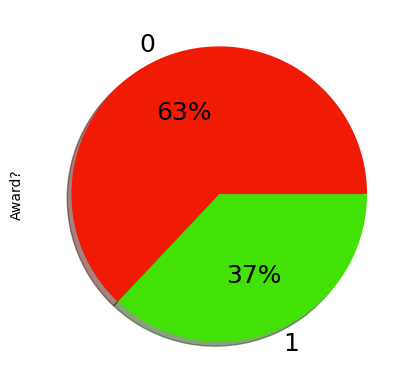

In [5]:
# Previously miles award status
data['Award?'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

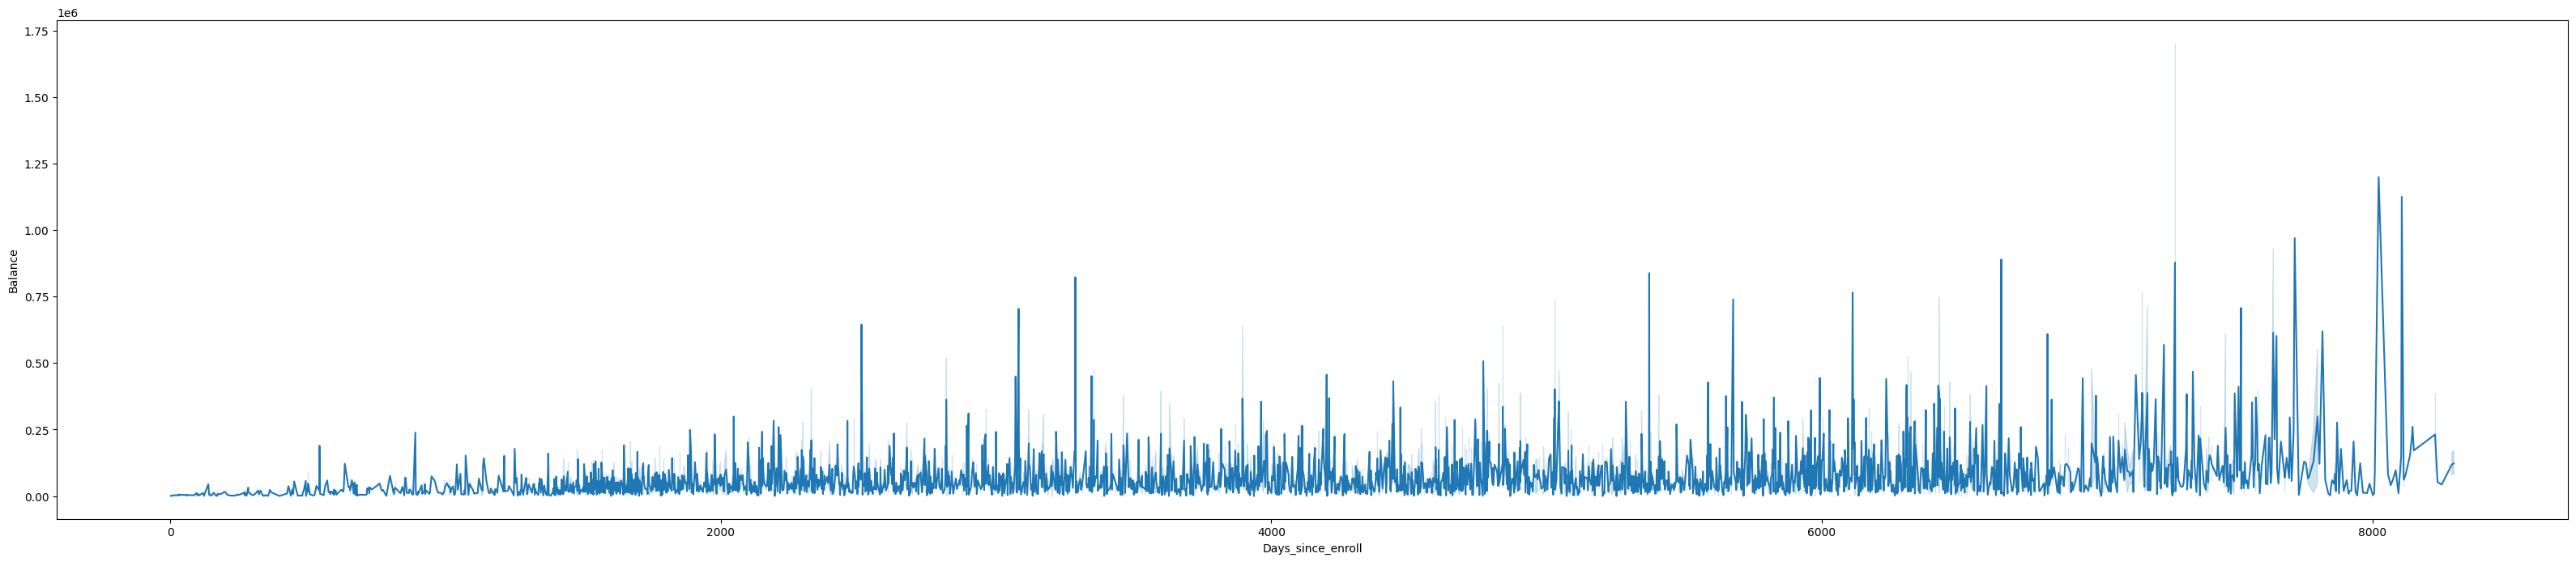

In [6]:
# Checking trend between balance miles & no. of days since enroll
fig, ax =plt.subplots(figsize=(40,8))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)

<AxesSubplot:>

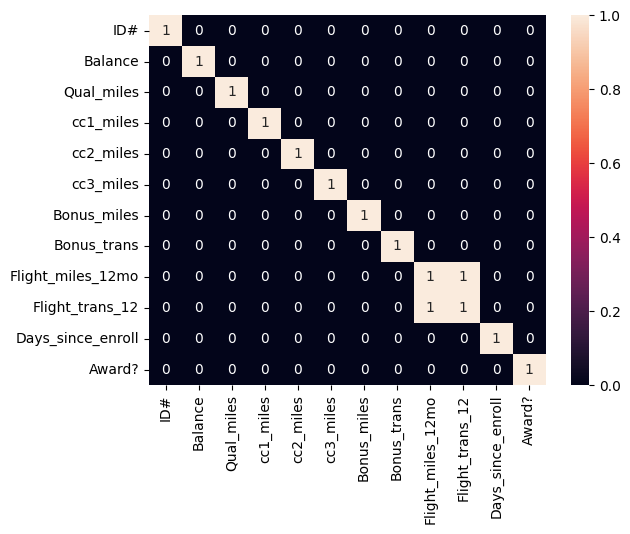

In [7]:
# Correlation analysis
sns.heatmap(data.corr()>0.85, annot=True)

In [8]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)
data_std[:5]

array([[-1.73512503, -0.45114078, -0.18629869, -0.76957841, -0.09824189,
        -0.06276658, -0.70278627, -1.10406452, -0.32860326, -0.36216787,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.53945687, -0.18629869, -0.76957841, -0.09824189,
        -0.06276658, -0.7010884 , -0.99992616, -0.32860326, -0.36216787,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.32003123, -0.18629869, -0.76957841, -0.09824189,
        -0.06276658, -0.5392527 , -0.79164945, -0.32860326, -0.36216787,
         1.41192021, -0.7669193 ],
       [-1.7325402 , -0.58379852, -0.18629869, -0.76957841, -0.09824189,
        -0.06276658, -0.68928615, -1.10406452, -0.32860326, -0.36216787,
         1.37220839, -0.7669193 ],
       [-1.73167859,  0.23967783, -0.18629869,  1.40947095, -0.09824189,
        -0.06276658,  1.08312117,  1.49939447,  1.15493205,  0.69249029,
         1.36397545,  1.30391816]])

In [9]:
# PCA analysis of the data
from sklearn.decomposition import PCA

pca = PCA(random_state=10, n_components=0.95)
x_reduced = pca.fit_transform(data_std)
x_reduced[:5]

array([[-0.78839653, -1.8984719 , -1.88107818,  0.12118198,  0.46542244,
        -0.17222577,  0.06224785, -0.36986981,  0.35307341],
       [-0.77682058, -1.87357576, -1.85176215,  0.14160508,  0.46162639,
        -0.18702519,  0.00785493, -0.46074797,  0.28375487],
       [-0.54452025, -1.87175172, -1.76980096,  0.14659939,  0.44399899,
        -0.17556146,  0.16162867, -0.40298993,  0.17035664],
       [-0.83140444, -1.88389834, -1.86170272,  0.13336781,  0.46845175,
        -0.18501522, -0.02249716, -0.45625631,  0.3760427 ],
       [ 3.41485547, -0.62773256, -0.55703006,  0.20850707, -0.16983619,
        -0.58562328, -0.80142007, -0.45893427, -0.08772388]])

### K-Means Clustering 

Model1


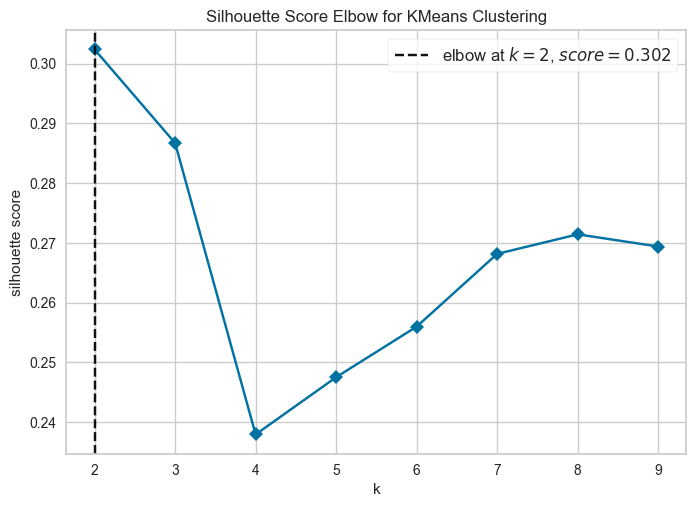

Model2


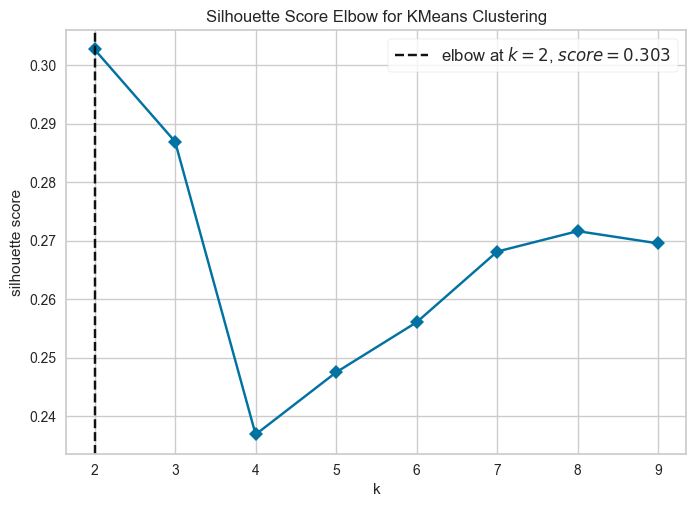

In [10]:
# Identifying optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('Model1')
visualizer1.fit(x_reduced)    
visualizer1.poof()
plt.show()

print('Model2')
visualizer2.fit(x_reduced)    
visualizer2.poof()
plt.show()

In [11]:
# Identifying optimal number of clusters using silhouette score
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(x_reduced)
    sil_score1= silhouette_score(x_reduced, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3023608071455872
For n_clusters = 3 The average silhouette_score is : 0.2867026060172694
For n_clusters = 4 The average silhouette_score is : 0.23792874084664914
For n_clusters = 5 The average silhouette_score is : 0.24751123779955903
For n_clusters = 6 The average silhouette_score is : 0.255977200884945
For n_clusters = 7 The average silhouette_score is : 0.2681560263501027
For n_clusters = 8 The average silhouette_score is : 0.27141835571388623
For n_clusters = 9 The average silhouette_score is : 0.2693852346751594


In [12]:
# Model building using cluster numbers = 2
model = KMeans(n_clusters=2, random_state=0)
y_predict = model.fit_predict(x_reduced)
y_predict.shape

(3999,)

In [13]:
# Cluster labels...
y_predict[:5]

array([1, 1, 1, 1, 0])

In [14]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
# Cluster centres associated with each lables
model.cluster_centers_

array([[ 2.09649493, -0.19520464,  0.3002904 , -0.07325712, -0.11976748,
         0.01837314, -0.06184229, -0.04225149,  0.01960844],
       [-1.03181971,  0.09607273, -0.14779218,  0.03605453,  0.05894526,
        -0.0090426 ,  0.03043656,  0.02079467, -0.00965057]])

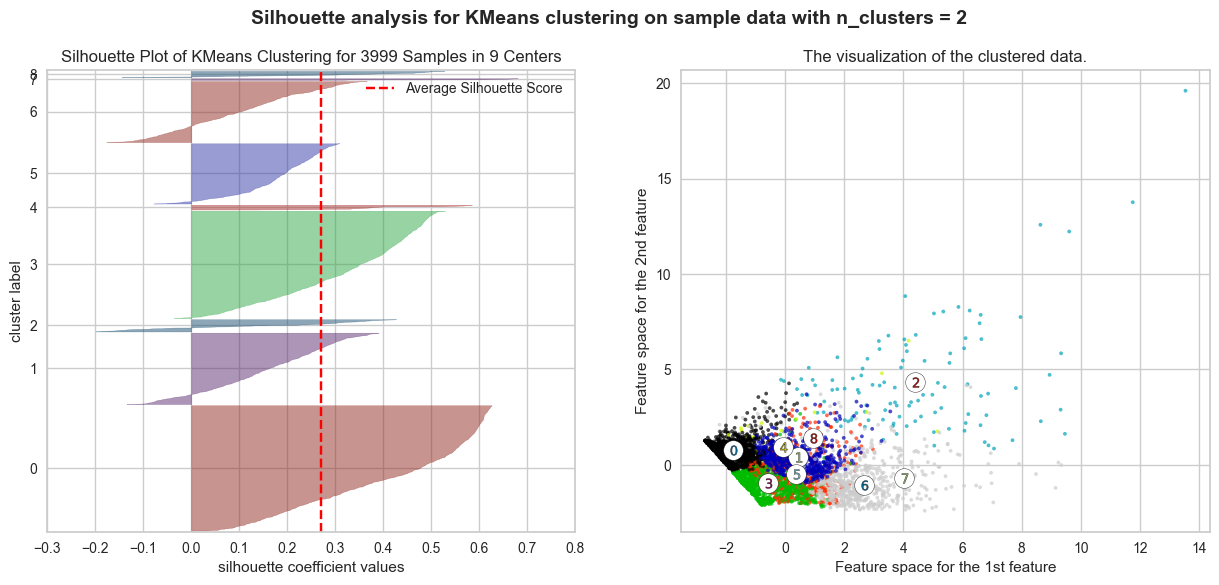

In [16]:
# Visualizing clusters with silhoutte scores
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(x_reduced)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(x_reduced[:, 0], x_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [17]:
# Creating dataframe of cluster lables..
model1_cluster = pd.DataFrame(model.labels_.copy(), columns=['Kmeans_Clustering'])

In [18]:
# Concating model1_Cluster df with main data copy
Kmeans_df = pd.concat([data.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


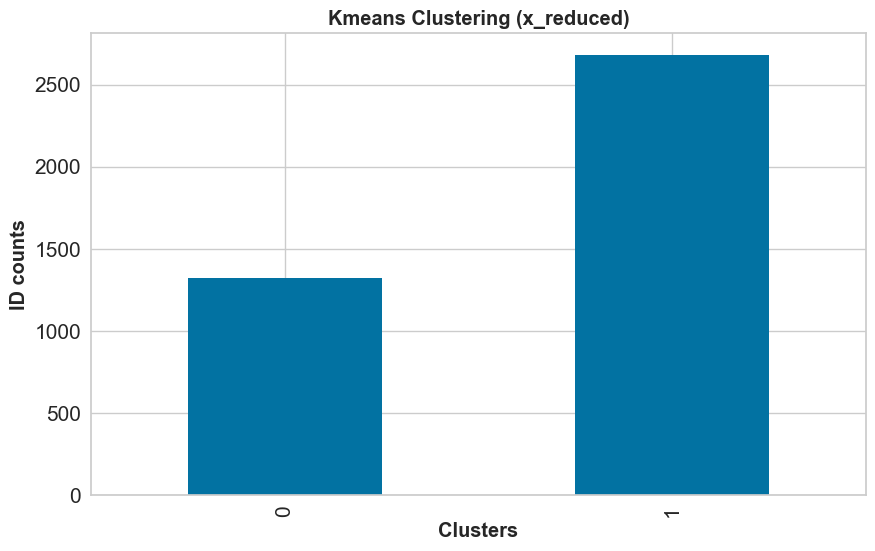

In [19]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (x_reduced)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Hierarchical Clustering 

In [20]:
# Identifying optimal number of clusters using silhouette score
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(x_reduced)
        silhouette_score1 = silhouette_score(x_reduced, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.18255662664414402
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7987395677848281
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7987395677848281
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8456193779284614

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.18597105571202113
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7635930601533024
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7635930601533024
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7207874487389195

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.19335400761106314
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6484324809831106
For n_clusters = 4 The average silhouette_score with linkage- average : 0.715235422095793
For

In [21]:
# Hierarchical clustering model
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred_hie = agg_clustering.fit_predict(x_reduced)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# Cluster labels for each point
agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# Clustering Score
(silhouette_score(x_reduced, agg_clustering.labels_)*100).round(3)

79.874

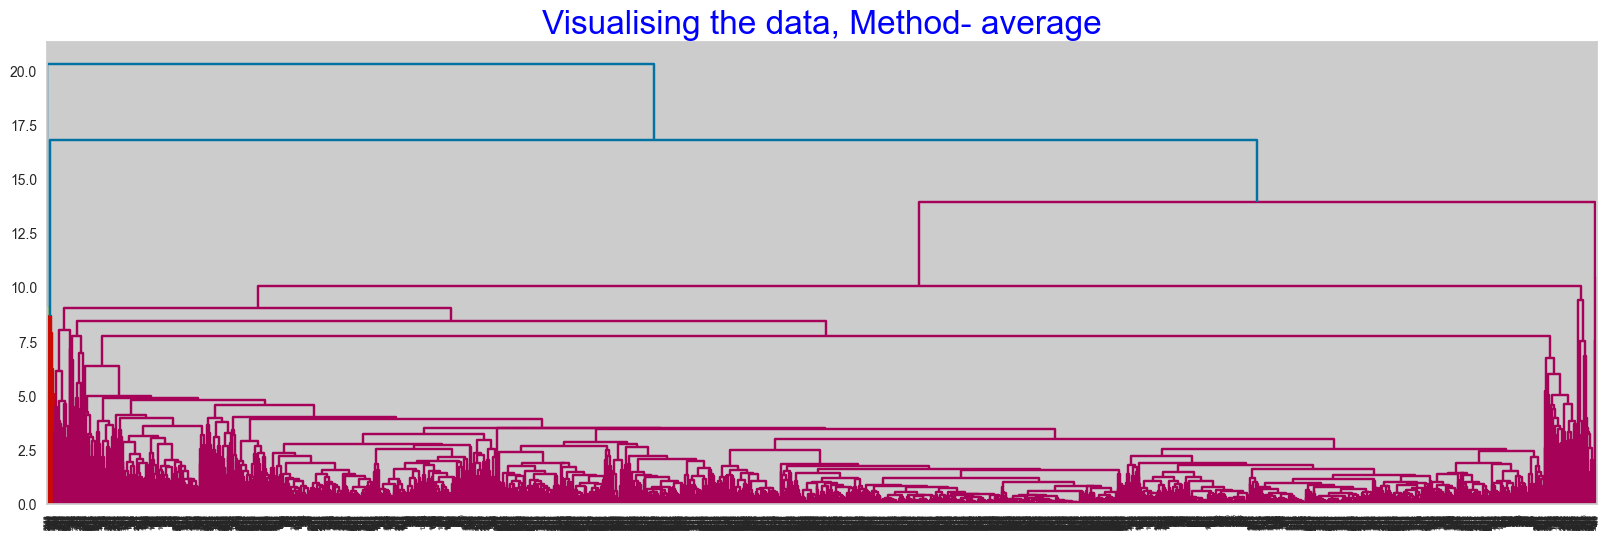

In [24]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(x_reduced, method = methods,optimal_ordering=False))

In [25]:
# Creating dataframe of cluster lables..
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [26]:
# Concating clustered results dataframewith main data copy
hie_df = pd.concat([data.copy(), hie_cluster], axis=1)
hie_df .head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


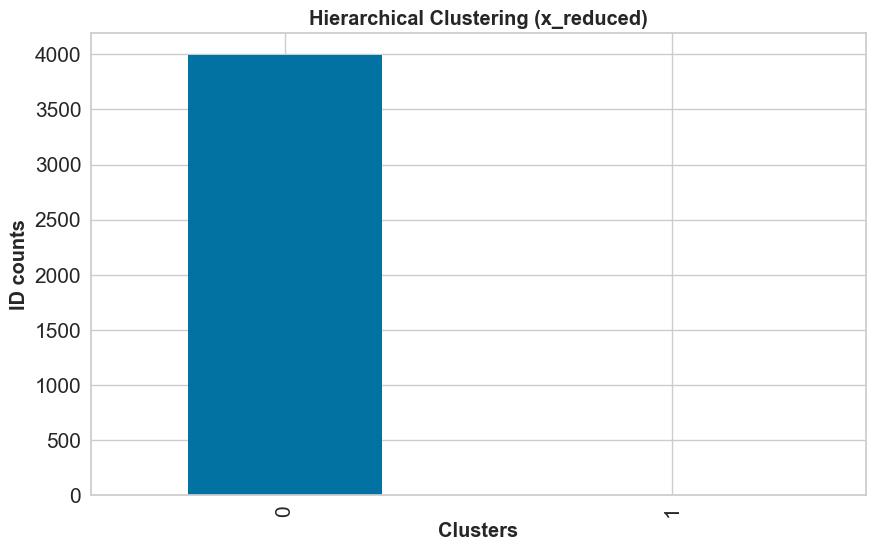

In [27]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (x_reduced)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [28]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Kmeans_Clustering,,,,,,,,,,,,
0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
1,2680,2680,2680,2680,2680,2680,2680,2680,2680,2680,2680,2680


In [29]:
hie_df.groupby(['Hie_Clustering']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Hie_Clustering,,,,,,,,,,,,
0,3995,3995,3995,3995,3995,3995,3995,3995,3995,3995,3995,3995
1,4,4,4,4,4,4,4,4,4,4,4,4
